In [1]:
#Import Libraries

import cv2
import numpy as np
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
# Constants
CLEANED_DATA_FOLDER = 'cleaned_data'
PROCESSED_DATA_FOLDER = 'processed_data'
FINAL_IMAGE_SIZE = (256, 256)  # Final size for all images
SAMPLE_IMAGES_COUNT = 1  # Number of images to display for illustration per each class
BORDER_COLOR = 'black'  # Border color for the images
BORDER_WIDTH = 5  # Border width in pixels

In [3]:
#Function to Display Images

def display_images_with_border(image_paths, title):
    """
    Displays a set of images with a border around each.
    """
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    fig.suptitle(title)

    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        bordered_img = ImageOps.expand(img, border=BORDER_WIDTH, fill=BORDER_COLOR)
        ax.imshow(bordered_img)
        ax.axis('off')

    plt.show()

In [4]:
#Function to Find Leaf Bounding Box

def find_leaf_bounding_box(image):
    """
    Identifies the bounding box of the leaf in the image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contour = max(contours, key=cv2.contourArea)

    return cv2.boundingRect(leaf_contour)

In [5]:
#Function to Process All Images and Display Selected Images

def process_all_images_and_display_selected(src_folder, dest_folder, final_size, sample_count):
    """
    Processes all images in the dataset and displays a selected few.
    """
    sample_before_paths = []
    sample_after_paths = []

    for class_folder in os.listdir(src_folder):
        class_path = os.path.join(src_folder, class_folder)
        dest_class_folder = os.path.join(dest_folder, class_folder)
        os.makedirs(dest_class_folder, exist_ok=True)

        images = sorted(os.listdir(class_path))
        selected_images = images[:sample_count]

        for img_filename in images:
            img_path = os.path.join(class_path, img_filename)
            dest_img_path = os.path.join(dest_class_folder, img_filename)

            if img_filename in selected_images:
                # Save paths for display
                sample_before_paths.append(img_path)

            image = cv2.imread(img_path)
            x, y, w, h = find_leaf_bounding_box(image)
            cropped_img = image[y:y+h, x:x+w]
            resized_img = cv2.resize(cropped_img, final_size, interpolation=cv2.INTER_AREA)

            cv2.imwrite(dest_img_path, resized_img)

            if img_filename in selected_images:
                # Save paths for display
                sample_after_paths.append(dest_img_path)

    # Display images before and after processing
    display_images_with_border(sample_before_paths, "Selected Images Before Cropping")
    display_images_with_border(sample_after_paths, "Selected Images After Cropping")


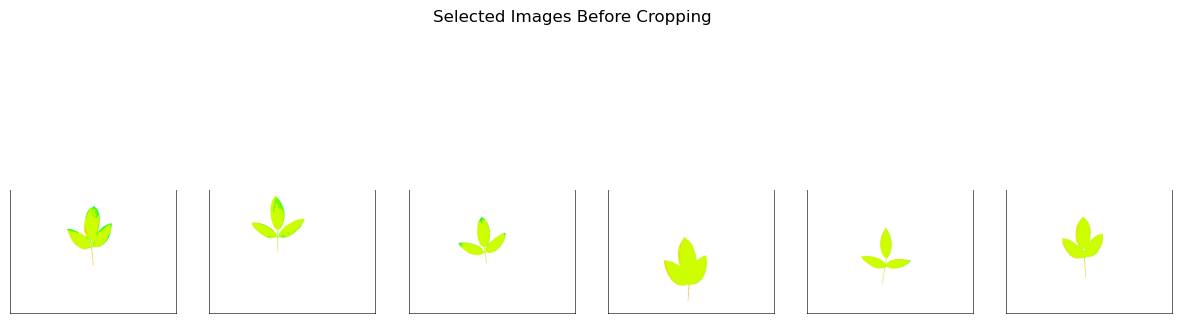

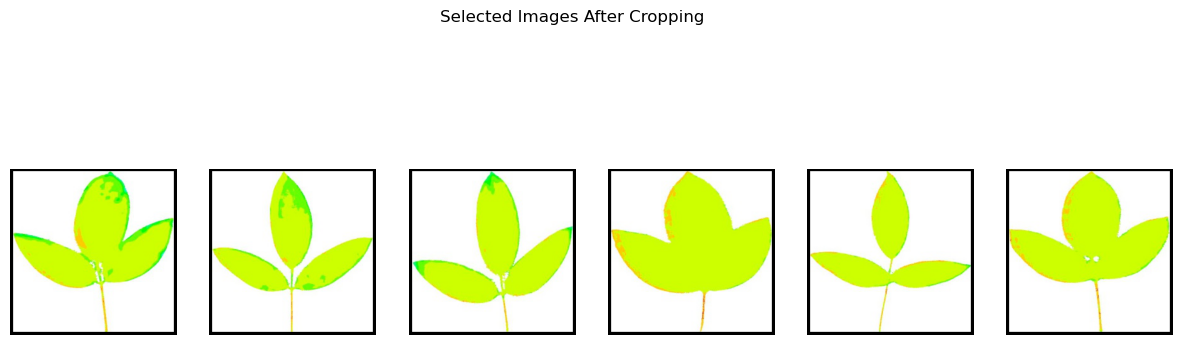

All processed images saved in processed_data


In [7]:
#Main Function to Execute Preprocessing

def main():
    process_all_images_and_display_selected(CLEANED_DATA_FOLDER, PROCESSED_DATA_FOLDER, FINAL_IMAGE_SIZE, SAMPLE_IMAGES_COUNT)
    print(f"All processed images saved in {PROCESSED_DATA_FOLDER}")

if __name__ == "__main__":
    main()